In [1]:
import pandas as pd
import numpy as np

In [3]:
data= pd.read_csv('../Dataset/diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score,GridSearchCV

In [8]:
target='Outcome'

In [9]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
predictors=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [15]:
import matplotlib.pylab as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [26]:
def modelfit(alg, data, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(data[predictors], data['Outcome'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(data[predictors])
    dtrain_predprob = alg.predict_proba(data[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, data[predictors], data['Outcome'], cv=cv_folds, scoring='accuracy')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(data['Outcome'].values, dtrain_predictions))
    print("AUC Score (data): %f" % roc_auc_score(data['Outcome'], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9062
AUC Score (data): 0.971530
CV Score : Mean - 0.7578728 | Std - 0.03558396 | Min - 0.7207792 | Max - 0.8104575


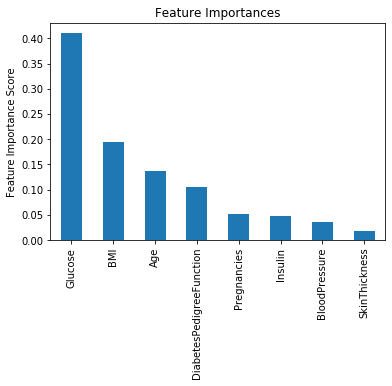

In [40]:

# ### Baseline Model
# Since here the criteria is AUC, simply predicting the most prominent class would give an AUC of 0.5 always. 
# Another way of getting a baseline model is to use the algorithm without tuning, i.e. with default parameters.

# In[10]:

#Choose all predictors except target & IDcols
predictors = [x for x in data.columns if x not in [target]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, data, predictors)


In [28]:
pd.Series(gbm0.feature_importances_, predictors).sort_values(ascending=False)

Glucose                     0.410327
BMI                         0.193756
Age                         0.136570
DiabetesPedigreeFunction    0.105235
Pregnancies                 0.052703
Insulin                     0.047103
BloodPressure               0.036564
SkinThickness               0.017742
dtype: float64

In [29]:
predictors1=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [36]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort='auto',
                                                  random_state=10,
                                                  subsample=0.8, tol=0.0001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(data[predictors1],data[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [37]:
dir(gsearch1)


['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score',
 'scorer_',
 'scoring',
 '

In [38]:
gsearch1.best_score_

0.5

In [39]:
gsearch1.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                 

In [41]:
param_test5 = {'subsample':[0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=4, 
                            min_samples_split=150, min_samples_leaf=70, random_state=10, max_features=7),
                       param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(data[predictors1],data[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features=7,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=70,
                                                  min_samples_split=150,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=70,
                                                  n_iter_no_change=None,
                                                  presort='


Model Report
Accuracy : 0.9062
AUC Score (data): 0.968903
CV Score : Mean - 0.7747645 | Std - 0.02404021 | Min - 0.751634 | Max - 0.8169935


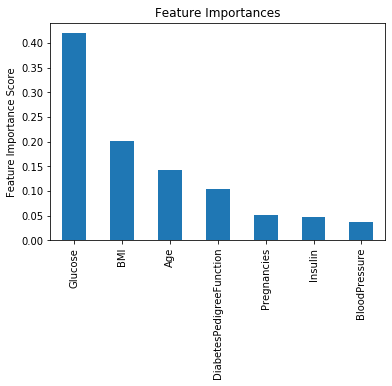

In [46]:
gbm1 = GradientBoostingClassifier(random_state=10)
modelfit(gbm1, data, predictors1)
gbm1.fit(data[predictors], data['Outcome'])
ypred=gbm1.predict(data[predictors])

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data[target],ypred)

array([[479,  21],
       [ 51, 217]], dtype=int64)